In [209]:
% matplotlib inline
import numpy as np
import pylab as pl
import mahotas as mh
import skimage as ski
import skimage.filters as skif
from scipy import ndimage as ndi
import matplotlib.pyplot as py
from skimage import segmentation
from skimage import morphology
from pprint import pprint
#from skimage.filters import 

In [210]:
img = mh.imread('blood2.jpg')

In [211]:
img2=np.mean(img,2).astype(u'uint8')
#img2 = img

In [212]:
thresh = mh.thresholding.otsu(img2)

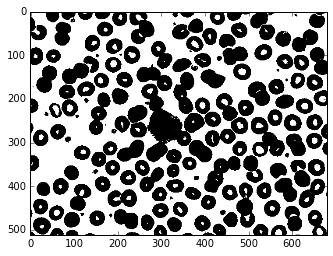

In [213]:
pl.gray()
pl.imshow(img2>thresh)

In [67]:
smooth = mh.gaussian_filter(img2,2).astype('uint8')

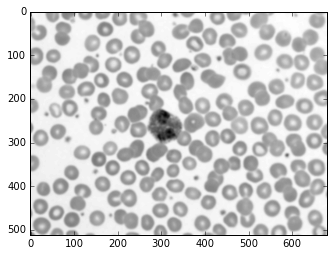

In [208]:
pl.imshow(smooth)

In [69]:
thresh = mh.thresholding.otsu(smooth);

In [70]:
mask = smooth>thresh

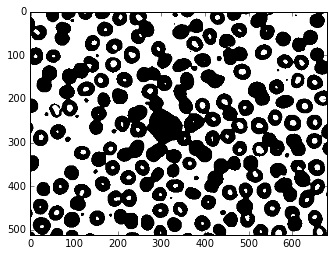

In [71]:
pl.imshow(mask)
pl.gray()

In [72]:
inverted = np.invert(smooth>thresh)

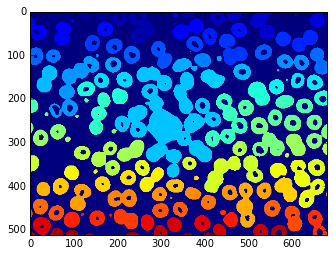

In [73]:
labeled, nobjects = mh.label(inverted)
pl.jet()
pl.imshow(labeled)

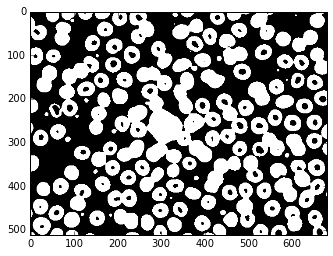

In [74]:
pl.gray()
pl.imshow(inverted)

In [75]:
filled = ndi.binary_fill_holes(inverted)

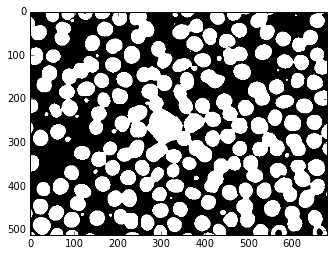

In [76]:
pl.imshow(filled)

In [77]:
elevation = skif.sobel(img2)

In [78]:
dist = mh.distance(filled)#filled)

In [79]:
dist2 = ndi.morphology.distance_transform_edt(filled)

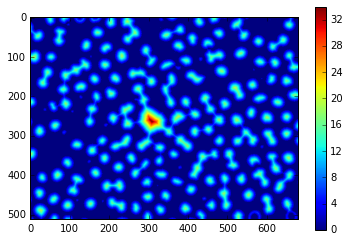

In [80]:
pl.imshow(dist2)
pl.jet()
pl.colorbar()

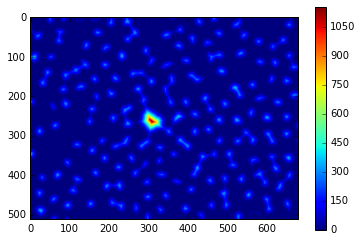

In [81]:
pl.imshow(dist)
pl.jet()
pl.colorbar()

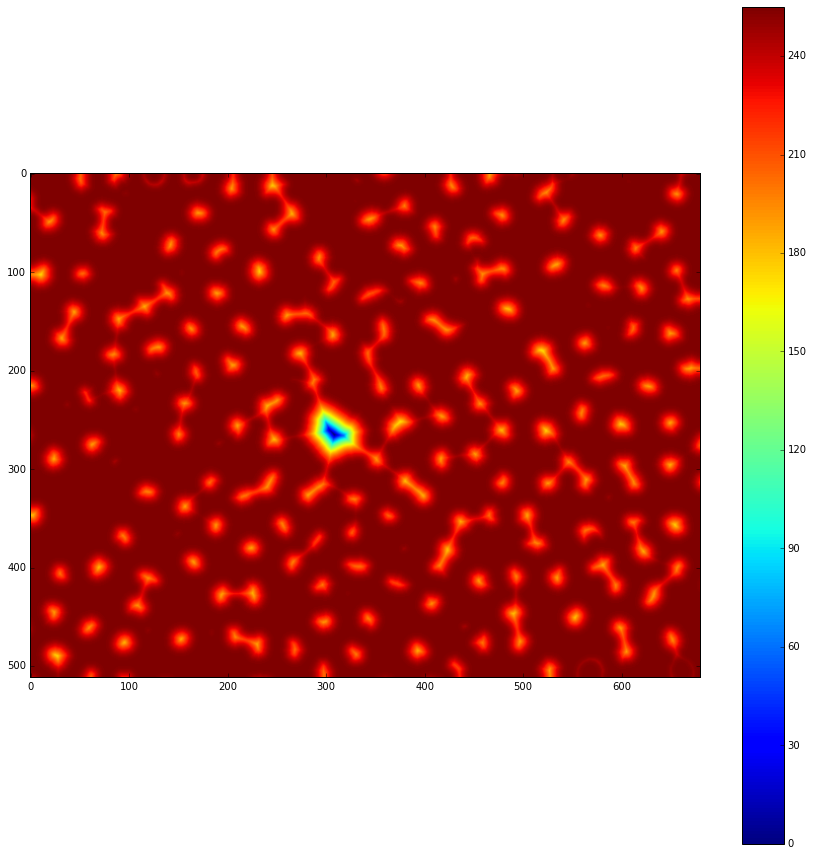

In [82]:
dist = dist.max() - dist
dist -= dist.min()
dist  = dist/float(dist.ptp()) * 255
dist = dist.astype(np.uint8)
pl.figure(figsize=(15,15))
pl.imshow(dist)
pl.jet()
pl.colorbar()

In [83]:
smooth2 = mh.gaussian_filter(dist,1.9).astype('uint8')

In [84]:
rmax = mh.regmin(smooth2)

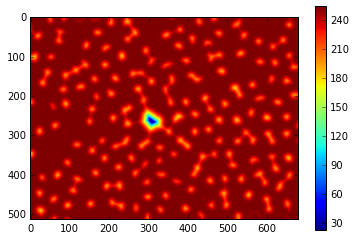

In [85]:
pl.imshow(smooth2)
pl.jet()
pl.colorbar()

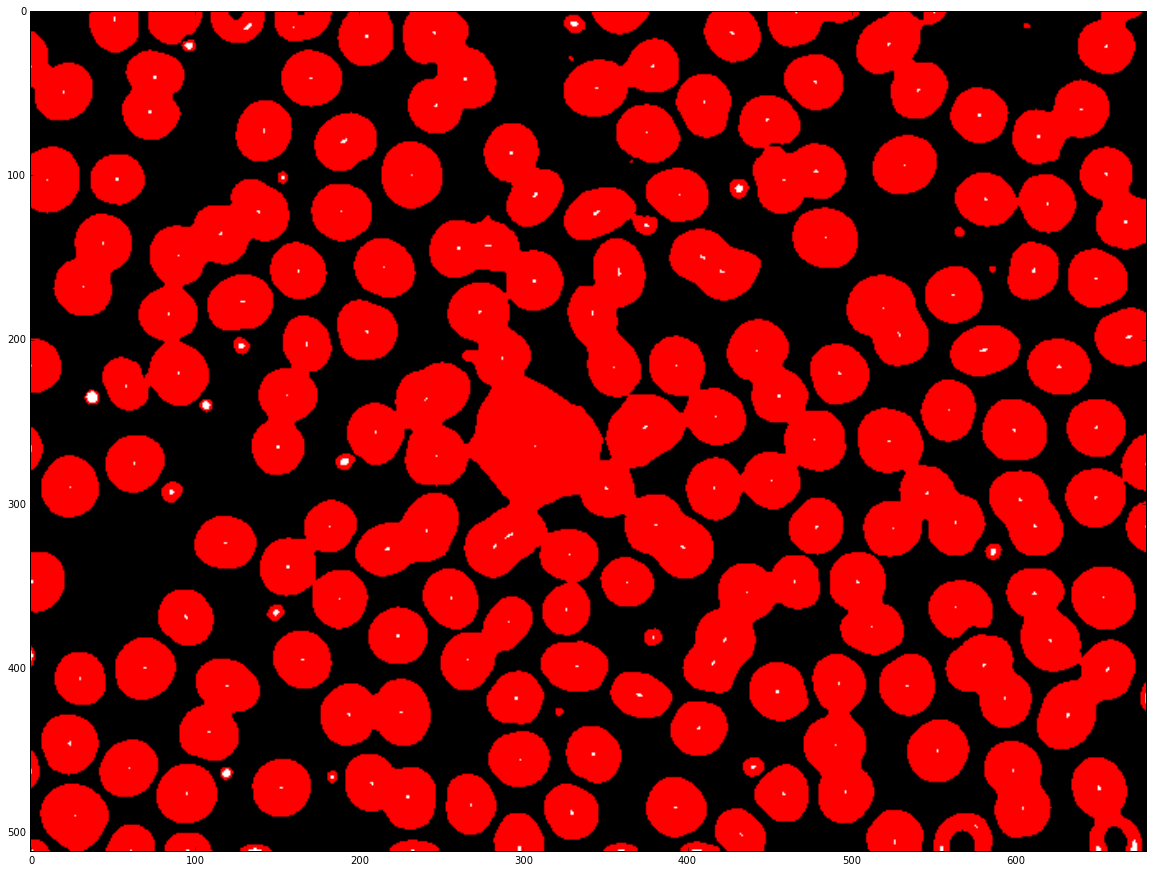

In [86]:
pl.figure(figsize=(20,20))
pl.imshow(mh.overlay(rmax,filled))
pl.gray()

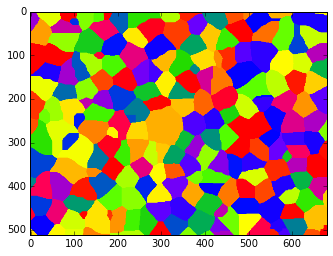

In [87]:
seeds, ncells = mh.label(rmax)
nuclei = mh.cwatershed(smooth2,seeds)
pl.imshow(nuclei)
pl.prism()

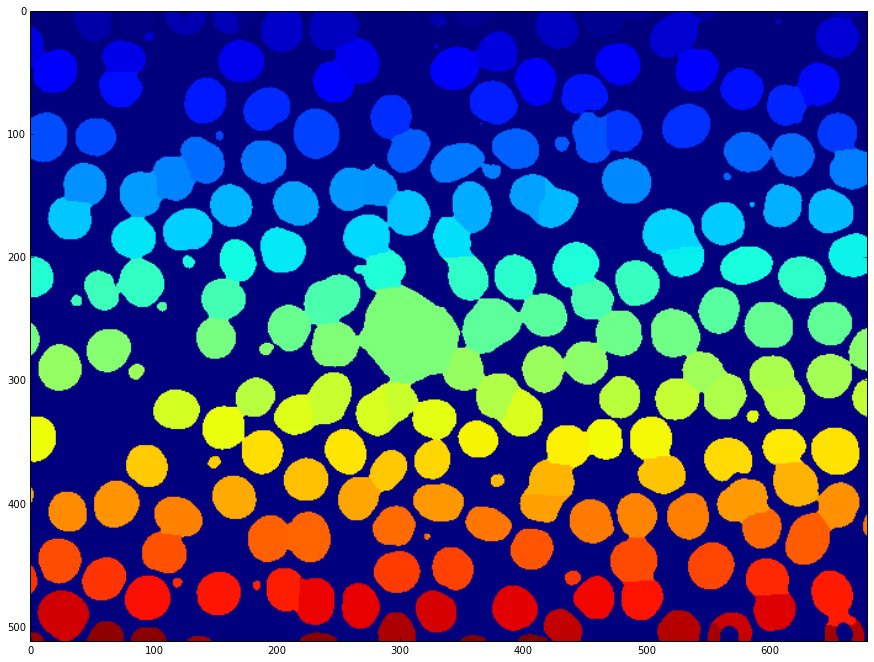

In [88]:
pl.figure(figsize=(15,15))
pl.imshow(nuclei*(filled))
pl.jet()

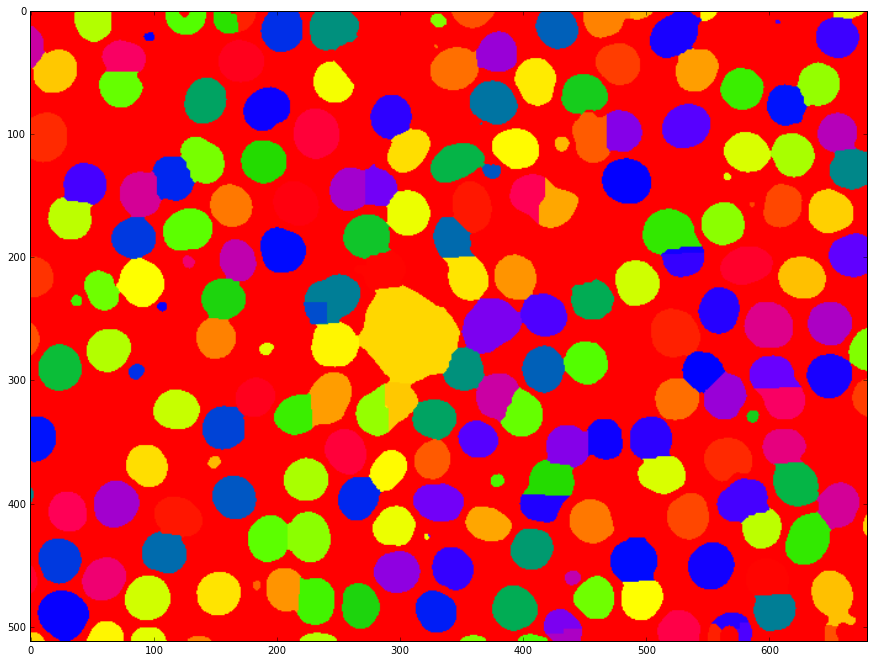

In [101]:
pl.figure(figsize=(15,15))
whole = (nuclei*filled)
pl.prism()
#print np.unique(whole)
pl.imshow(whole)

[  0   1   2   3   4   5   6   7   8  10  11  12  13  14  16  19  44  54
  80  86 107 113 127 139 158 172 187 202 204 206 207 208 209 210 211 212
 213 214 215 216 217 218]


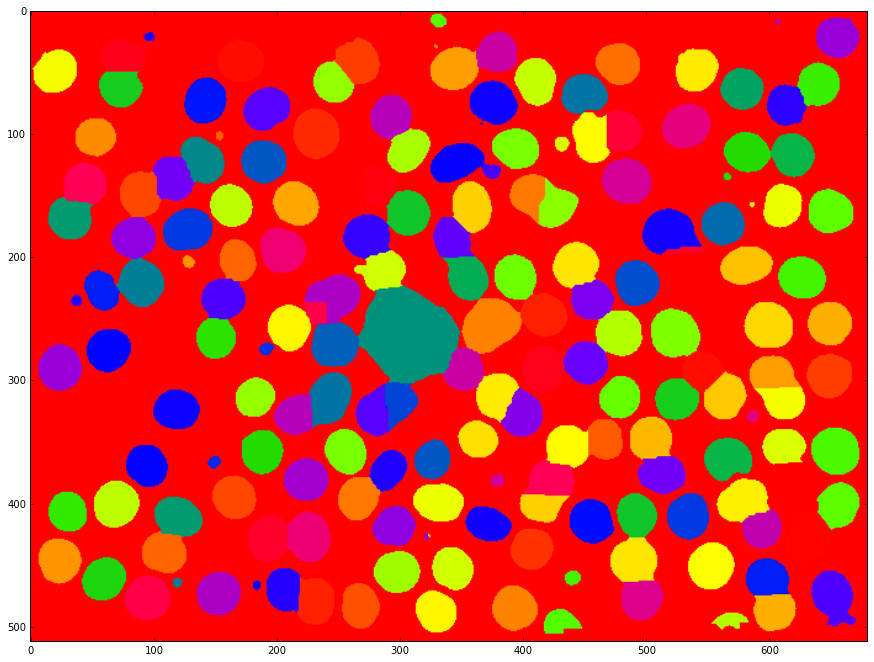

In [102]:
pl.figure(figsize=(15,15))
borders = np.zeros(whole.shape,np.bool)
borders[0:1,:] = 1
borders[-1:,:] = 1
borders[:,0:1] = 1
borders[:,-1:] = 1
at_border = np.unique(whole[borders])
print at_border
for obj in at_border:
    whole[whole==obj] = 0
pl.imshow(whole*filled)

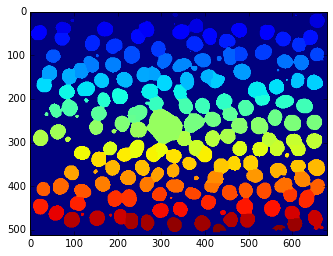

In [91]:
pl.imshow(whole)
pl.jet()

In [92]:
masked = whole*filled

In [93]:
np.unique(masked)

array([  0,   9,  15,  17,  18,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  45,  46,  47,  48,  49,  50,  51,  52,  53,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,
        83,  84,  85,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110,
       111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 203, 205])

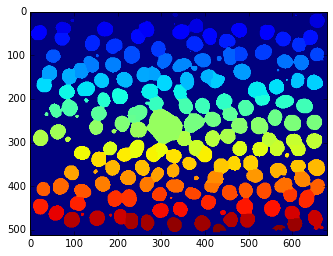

In [94]:
test = masked.copy()
pl.imshow(test)


In [200]:
def labelcells(image,kernelsize):
    img2=np.mean(img,2).astype(u'uint8')
    smooth = mh.gaussian_filter(img2,1.5).astype('uint8')
    thresh = mh.thresholding.otsu(img2)
    mask = smooth>thresh
    inverted = np.invert(smooth>thresh)
    filled = ndi.binary_fill_holes(inverted)
    #dist = mh.distance(filled)
    dist = ndi.morphology.distance_transform_edt(filled)
    dist = dist.max() - dist
    dist -= dist.min()
    dist  = dist/float(dist.ptp()) * 255
    dist = dist.astype(np.uint8)
    smooth2 = mh.gaussian_filter(dist,kernelsize).astype('uint8')
    rmax = mh.regmin(smooth2)
    seeds, ncells = mh.label(rmax)
    nuclei = mh.cwatershed(smooth2,seeds)
    whole = (nuclei*filled)
    return trimedges(whole), whole
    

def trimedges(whole):
    borders = np.zeros(whole.shape,np.bool)
    borders[0:1,:] = 1
    borders[-1:,:] = 1
    borders[:,0:1] = 1
    borders[:,-1:] = 1
    at_border = np.unique(whole[borders])
    for obj in at_border:
        whole[whole==obj] = 0
    return whole

def separatecells(labeled,image):
    cellimages = []
    ylen,xlen = labeled.shape
    x = []
    y = []
    for cell in np.unique(labeled)[1:]:
        cellmask = labeled.copy()
        cellmask[cellmask!=cell]=0
        cellmask[cellmask==cell]=1
        xmin = np.nonzero(cellmask.sum(axis = 0))[0].min()-5
        xmax = np.nonzero(cellmask.sum(axis = 0))[0].max()+5
        ymin = np.nonzero(cellmask.sum(axis = 1))[0].min()-5
        ymax = np.nonzero(cellmask.sum(axis = 1))[0].max()+5
        if xmin<0:
            xmin = 0
        if xmax>xlen:
            xmax = xlen
        if ymin<0:
            ymin = 0
        if ymax>ylen:
            ymax = ylen
        #takes care of cells close to edge that aren't touching it. Otherwise the pulled image won't work
        crop = image[ymin:ymax,xmin:xmax]
        cropmask = cellmask[ymin:ymax,xmin:xmax]
        cropmask = ndi.binary_dilation(cropmask,iterations=2)
        crop2 = np.empty(crop.shape)
        crop2[:,:,0] = cropmask*crop[:,:,0]
        crop2[:,:,1] = cropmask*crop[:,:,1]
        crop2[:,:,2] = cropmask*crop[:,:,2]
        crop2 = crop2.astype('uint8')
        cellimages.append((crop2))
        x.append(xmax-xmin)
        y.append(ymax-ymin)
    return cellimages, x, y

def imagetocells(image):
    labeled = labelcells(image,1.9)
    return separatecells(labeled,image), labeled

In [201]:
herewego, labeled2 = labelcells(img,1.9)

TypeError: Invalid dimensions for image data

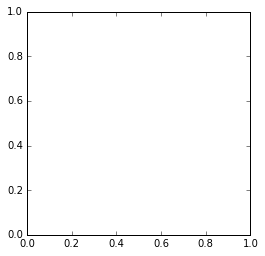

In [214]:
pl.imshow(herewego[0][2])

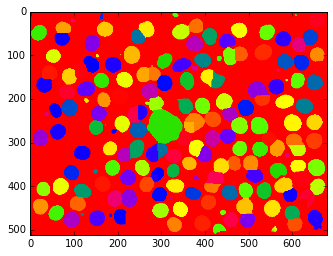

In [202]:
pl.imshow(labeled2)
pl.prism()

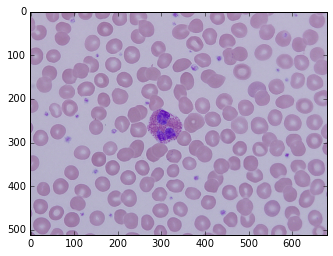

In [187]:
pl.imshow(img)

(512, 680)

In [98]:
test = labelcells(img,1.9)

In [99]:
test2 = trimedges(test)

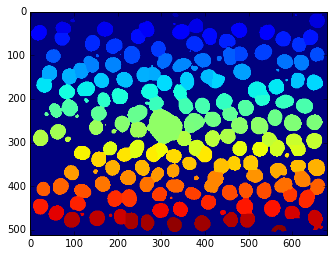

In [60]:
pl.imshow(test2)

In [51]:
np.unique(test)

array([  0,   9,  15,  17,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  47,  48,  49,  50,  51,  52,  53,  54,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        83,  84,  85,  86,  87,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 203, 205, 207])

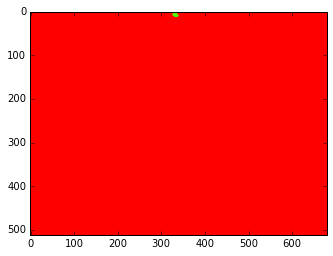

In [130]:
cellmask = test.copy()
cellmask[cellmask!=9]=0
cellmask[cellmask==9]=1
pl.imshow(cellmask)

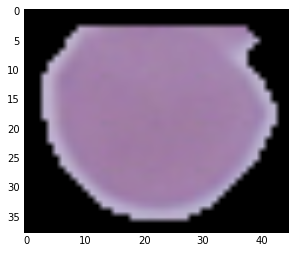

In [152]:
pl.imshow(herewego[15][1])

In [23]:
herewego[2][2]

array([], shape=(0, 17), dtype=bool)

In [40]:
# count = []

# markers = morphology.label(rmax) 
# markers[~filled] = -1
# randomwalk = segmentation.random_walker(filled,markers)

# for i in range(20,500,10):
#     kernel = float(i)/100
#     smooth2 = mh.gaussian_filter(dist,kernel).astype('uint8')
#     rmax = mh.regmax(smooth2)
#     seeds, ncells = mh.label(rmax)
#     count.append(ncells)
    
# fig = pl.figure()
# pl.imshow(crop2[20:25,20:25,:])
# pl.colorbar()
# # pl.hold(True)
# # pl.plot(range(0,45),[20]*45)
# # pl.plot(range(0,45),[21]*45)
# # pl.plot([21]*45,range(0,45))
# # pl.plot([20]*45,range(0,45))
# strout = ''
# for row in crop2[:,:,0]:
#     strout += str(list(row)) + '\n'
# with open('fuckity.dat','w') as outfile:
#     outfile.write(strout)